In [1]:
from pydub import AudioSegment
from pydub.playback import play
import ffmpeg 
import scipy.signal
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
# 音楽データの読み込み
load_name = "data/ambulance12.mp3"
sound = AudioSegment.from_mp3(load_name)

# NumPy配列に返還
data = np.array(sound.get_array_of_samples())

# ステレオ音声から片方を抽出

print("再生時間は{}[秒]".format(sound.duration_seconds)) # 再生時間(秒)
print("サンプリングレートは{}[Hz]".format(sound.frame_rate))  # サンプリングレート(Hz)
print("チャンネル数は{}[ch]".format(sound.channels))  # チャンネル数(1:mono, 2:stereo)

再生時間は730.9013333333334[秒]
サンプリングレートは48000[Hz]
チャンネル数は2[ch]


In [3]:
data_list = []

cut_wide_t = 4 #[s]
overlap = 2 #[s]
i = 0

for i in tqdm(range(int(len(data)/(sound.frame_rate*2)))):
    
    for a in range(-6,7):
    
        plt.figure(figsize=(3,3))
        plt.ylim(500,2000)

        ax = plt.gca()
        ax.axis("off")

        x = data[(overlap*i)*sound.frame_rate : (cut_wide_t+(overlap*i))*sound.frame_rate]
        frq, t, Pxx = scipy.signal.stft(x, fs=48000, nperseg=4800, noverlap=2400)
        Pxx = 10 * np.log(np.abs(Pxx))
        Pxx = np.roll(Pxx.T, a)

        plt.pcolormesh(t, frq, Pxx.T, cmap = 'jet')
        plt.savefig("train_data/{}_{}_{}_.jpg".format(load_name.split("/")[-1].split(".")[0],i,a))

        plt.clf()
        plt.close() #メモリ解放　https://qiita.com/Masahiro_T/items/bdd0482a8efd84cdd270
        
    
    

  0%|          | 0/730 [00:00<?, ?it/s]

In [15]:
int(len(data)/(sound.frame_rate*2))

730

In [ ]:
len(data)

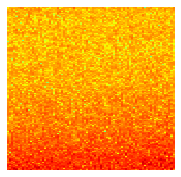

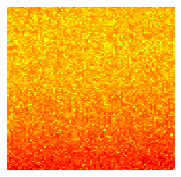

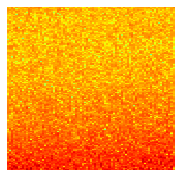

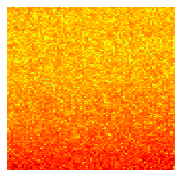

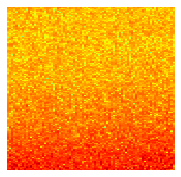

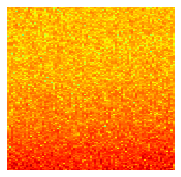

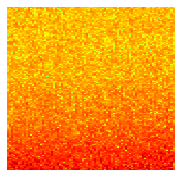

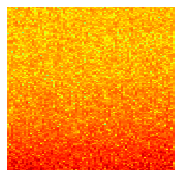

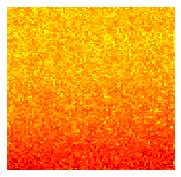

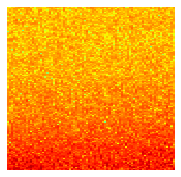

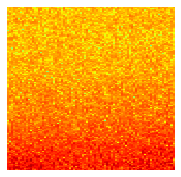

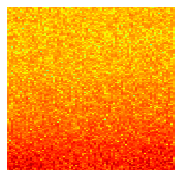

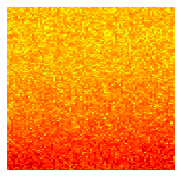

In [34]:
for a in range(-6,7):

    plt.figure(figsize=(3,3))
    plt.ylim(500,2000)

    ax = plt.gca()
    ax.axis("off")

    x = data[(overlap*i)*sound.frame_rate : (cut_wide_t+(overlap*i))*sound.frame_rate]
    frq, t, Pxx = scipy.signal.stft(x, fs=48000, nperseg=4800, noverlap=2400)
    Pxx = 10 * np.log(np.abs(Pxx))
    Pxx = np.roll(Pxx.T, a)

    plt.pcolormesh(t, frq, Pxx.T, cmap = 'jet')
    plt.savefig("train_data/{}_{}_.jpg".format(load_name.split("/")[-1].split(".")[0],i))


    plt.show()